# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [75]:
import pandas as pd
from pycaret.classification import setup, compare_models, predict_model, save_model, load_model
df = pd.read_csv("C:/Users/johnm/intro_datascience/week 3/cleandata.csv", index_col='customerID')
df.drop('daily_charges',axis=1,inplace=True)
df.rename({'tchargeratio'  :  'charge_per_tenure'}, axis=1, inplace=True)
print(df.head())
print(df.Churn.value_counts(normalize=True))

            tenure  MonthlyCharges  TotalCharges  PhoneService  Contract  \
customerID                                                                 
7590-VHVEG       1           29.85         29.85             0         0   
5575-GNVDE      34           56.95       1889.50             1         1   
3668-QPYBK       2           53.85        108.15             1         0   
7795-CFOCW      45           42.30       1840.75             0         1   
9237-HQITU       2           70.70        151.65             1         0   

            PaymentMethod  Churn  charge_per_tenure  
customerID                                           
7590-VHVEG              0      0          29.850000  
5575-GNVDE              1      0          55.573529  
3668-QPYBK              1      1          54.075000  
7795-CFOCW              2      0          40.905556  
9237-HQITU              0      1          75.825000  
0    0.73463
1    0.26537
Name: Churn, dtype: float64


In [53]:
automl = setup(df, target='Churn')
automl

,Description,Value
0,session_id,4751
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7043, 8)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


(False,
 10,
             tenure  TotalCharges  charge_per_tenure  PhoneService_1  \
 customerID                                                            
 7590-VHVEG     1.0     29.850000          29.850000             0.0   
 5575-GNVDE    34.0   1889.500000          55.573528             1.0   
 3668-QPYBK     2.0    108.150002          54.075001             1.0   
 7795-CFOCW    45.0   1840.750000          40.905556             0.0   
 9237-HQITU     2.0    151.649994          75.824997             1.0   
 ...            ...           ...                ...             ...   
 6840-RESVB    24.0   1990.500000          82.937500             1.0   
 2234-XADUH    72.0   7362.899902         102.262497             1.0   
 4801-JZAZL    11.0    346.450012          31.495455             0.0   
 8361-LTMKD     4.0    306.600006          76.650002             1.0   
 3186-AJIEK    66.0   6844.500000         103.704544             1.0   
 
             Contract_0  Contract_1  Contract_2  

In [54]:
automl[2]

,tenure,TotalCharges,charge_per_tenure,PhoneService_1,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
customerID,,,,,,,,,,,
7590-VHVEG,1.0,29.850000,29.850000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5575-GNVDE,34.0,1889.500000,55.573528,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3668-QPYBK,2.0,108.150002,54.075001,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7795-CFOCW,45.0,1840.750000,40.905556,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9237-HQITU,2.0,151.649994,75.824997,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24.0,1990.500000,82.937500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2234-XADUH,72.0,7362.899902,102.262497,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4801-JZAZL,11.0,346.450012,31.495455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [55]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7959,0.8402,0.5452,0.6356,0.5862,0.4520,0.4548,0.6210
ridge,Ridge Classifier,0.7919,0.0000,0.4726,0.6492,0.5461,0.4155,0.4249,0.0050
lda,Linear Discriminant Analysis,0.7899,0.8300,0.5314,0.6222,0.5725,0.4345,0.4373,0.0060
gbc,Gradient Boosting Classifier,0.7888,0.8391,0.4939,0.6324,0.5534,0.4181,0.4243,0.0570
ada,Ada Boost Classifier,0.7866,0.8384,0.4977,0.6238,0.5526,0.4151,0.4202,0.0280
catboost,CatBoost Classifier,0.7854,0.8365,0.4932,0.6208,0.5489,0.4107,0.4158,0.6160
lightgbm,Light Gradient Boosting Machine,0.7805,0.8287,0.4963,0.6068,0.5447,0.4023,0.4066,0.1450
xgboost,Extreme Gradient Boosting,0.7692,0.8150,0.4810,0.5779,0.5241,0.3738,0.3770,0.1140
knn,K Neighbors Classifier,0.7657,0.7434,0.4328,0.5780,0.4943,0.3462,0.3526,0.2280
rf,Random Forest Classifier,0.7560,0.7869,0.4596,0.5501,0.4989,0.3398,0.3433,0.0700


In [56]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4751, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
df.iloc[-10:-1].shape

(9, 8)

In [58]:
preds_test=df.iloc[-10:-1]
preds_test

,tenure,MonthlyCharges,TotalCharges,PhoneService,Contract,PaymentMethod,Churn,charge_per_tenure
customerID,,,,,,,,
9767-FFLEM,38,69.50,2625.25,1,0,3,0,69.085526
0639-TSIQW,67,102.95,6886.25,1,0,3,1,102.779851
8456-QDAVC,19,78.70,1495.10,1,0,2,0,78.689474
7750-EYXWZ,12,60.65,743.30,0,1,0,0,61.941667
2569-WGERO,72,21.15,1419.40,1,2,2,0,19.713889
6840-RESVB,24,84.80,1990.50,1,1,1,0,82.937500
2234-XADUH,72,103.20,7362.90,1,1,3,0,102.262500
4801-JZAZL,11,29.60,346.45,0,0,0,0,31.495455
8361-LTMKD,4,74.40,306.60,1,0,1,1,76.650000


In [60]:
predict_model(best_model,preds_test)

,tenure,MonthlyCharges,TotalCharges,PhoneService,Contract,PaymentMethod,Churn,charge_per_tenure,Label,Score
customerID,,,,,,,,,,
9767-FFLEM,38,69.50,2625.25,1,0,3,0,69.085526,0,0.8230
0639-TSIQW,67,102.95,6886.25,1,0,3,1,102.779851,0,0.7522
8456-QDAVC,19,78.70,1495.10,1,0,2,0,78.689474,0,0.5609
7750-EYXWZ,12,60.65,743.30,0,1,0,0,61.941667,0,0.6040
2569-WGERO,72,21.15,1419.40,1,2,2,0,19.713889,0,0.9993
6840-RESVB,24,84.80,1990.50,1,1,1,0,82.937500,0,0.8739
2234-XADUH,72,103.20,7362.90,1,1,3,0,102.262500,0,0.9273
4801-JZAZL,11,29.60,346.45,0,0,0,0,31.495455,1,0.5181
8361-LTMKD,4,74.40,306.60,1,0,1,1,76.650000,0,0.5073


In [61]:
save_model(best_model, 'logistic')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                 

In [22]:
pd.read_pickle("logistic.pkl")

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'PhoneService',
       'Contract', 'PaymentMethod', 'daily_charges', 'tchargeratio'],
      dtype=object)

In [62]:
loaded_logistic = load_model('logistic')
loaded_logistic

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                  

In [63]:
predict_model(loaded_logistic,preds_test)

,tenure,MonthlyCharges,TotalCharges,PhoneService,Contract,PaymentMethod,Churn,charge_per_tenure,Label,Score
customerID,,,,,,,,,,
9767-FFLEM,38,69.50,2625.25,1,0,3,0,69.085526,0,0.8230
0639-TSIQW,67,102.95,6886.25,1,0,3,1,102.779851,0,0.7522
8456-QDAVC,19,78.70,1495.10,1,0,2,0,78.689474,0,0.5609
7750-EYXWZ,12,60.65,743.30,0,1,0,0,61.941667,0,0.6040
2569-WGERO,72,21.15,1419.40,1,2,2,0,19.713889,0,0.9993
6840-RESVB,24,84.80,1990.50,1,1,1,0,82.937500,0,0.8739
2234-XADUH,72,103.20,7362.90,1,1,3,0,102.262500,0,0.9273
4801-JZAZL,11,29.60,346.45,0,0,0,0,31.495455,1,0.5181
8361-LTMKD,4,74.40,306.60,1,0,1,1,76.650000,0,0.5073


In [66]:
%run data_preds_fun.py

Transformation Pipeline and Model Successfully Loaded
predictions:
            Churn_prob Churn_prediction
customerID                             
9305-CKSKC      0.8448         No Churn
1452-KNGVK      0.9453            Churn
6723-OKKJM      0.9351         No Churn
7832-POPKP      0.9703         No Churn
6348-TACGU      0.9995            Churn


In [79]:
my_preds=predict_model(best_model,df)
my_preds

,tenure,MonthlyCharges,TotalCharges,PhoneService,Contract,PaymentMethod,Churn,charge_per_tenure,Label,Score
customerID,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,0,0,0,0,29.850000,1,0.6627
5575-GNVDE,34,56.95,1889.50,1,1,1,0,55.573529,0,0.9663
3668-QPYBK,2,53.85,108.15,1,0,1,1,54.075000,0,0.6103
7795-CFOCW,45,42.30,1840.75,0,1,2,0,40.905556,0,0.9648
9237-HQITU,2,70.70,151.65,1,0,0,1,75.825000,1,0.6818
...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,84.80,1990.50,1,1,1,0,82.937500,0,0.8739
2234-XADUH,72,103.20,7362.90,1,1,3,0,102.262500,0,0.9273
4801-JZAZL,11,29.60,346.45,0,0,0,0,31.495455,1,0.5181


In [99]:
p_list=[]
for i in my_preds['Score']:
    if i>=.90:
        p_list.append("90th ")
        
    elif i>=.80:
        p_list.append("80th")
        
    elif i >=.70:
       p_list.append("70th")
    elif i>=.60:
        p_list.append("60th")
        
    elif i>= .50:
        p_list.append("50th")
    elif i>=.40:
        p_list.append("40th")
        
    elif i >=.30:
        p_list.append("30th")
    elif i>= .20:
        p_list.append("20th")
        
    elif i>= .10:
        p_list.append("10th")
        
    else:
        p_list.append("low")
    
print(p_list)
    
    
    

['60th', '90th ', '60th', '90th ', '60th', '70th', '50th', '60th', '60th', '90th ', '70th', '90th ', '90th ', '60th', '60th', '80th', '90th ', '90th ', '60th', '50th', '70th', '90th ', '70th', '90th ', '90th ', '80th', '50th', '60th', '90th ', '70th', '90th ', '60th', '90th ', '60th', '50th', '90th ', '50th', '80th', '60th', '60th', '90th ', '90th ', '90th ', '90th ', '50th', '70th', '60th', '60th', '90th ', '90th ', '60th', '50th', '70th', '50th', '90th ', '60th', '90th ', '80th', '90th ', '90th ', '50th', '70th', '90th ', '90th ', '70th', '60th', '90th ', '90th ', '90th ', '50th', '60th', '90th ', '80th', '90th ', '50th', '70th', '90th ', '60th', '60th', '90th ', '70th', '60th', '50th', '50th', '90th ', '60th', '90th ', '90th ', '90th ', '80th', '60th', '60th', '90th ', '60th', '90th ', '50th', '90th ', '70th', '90th ', '60th', '70th', '60th', '80th', '90th ', '80th', '60th', '80th', '90th ', '90th ', '90th ', '60th', '90th ', '50th', '60th', '90th ', '70th', '90th ', '70th', '90th '

In [106]:
my_preds["percentile"]=p_list
print(my_preds.sort_values(by="percentile",ascending=False).head(50))
9/10

            tenure  MonthlyCharges  TotalCharges  PhoneService  Contract  \
customerID                                                                 
2550-AEVRU      57           53.45       3053.00             1         1   
3569-JFODW      72           90.95       6652.45             1         2   
2560-QTSBS      72           23.30       1623.15             1         1   
7541-YLXCL      36           65.40       2498.40             1         1   
7860-UXCRM      63           74.50       4674.55             1         2   
2292-XQWSV      40           60.30       2448.50             0         1   
9447-YPTBX      50           19.85        943.10             1         1   
1552-CZCLL      55           20.00       1087.25             1         0   
9313-CDOGY      38           19.60        717.30             1         0   
9987-LUTYD      13           55.15        742.90             1         1   
1925-LFCZZ      55           50.05       2743.45             0         1   
8039-EQPIM  

0.9

In [130]:
def clean_data(full_df=df_fix):
    full_df['PhoneService'] =  full_df['PhoneService'].replace({'No': 0, 'Yes': 1})
    full_df['Contract'] =      full_df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
    full_df['PaymentMethod'] = full_df['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2,'Credit card (automatic)':3})
    #full_df['Churn'] =         full_df['Churn'].replace({'No': 0, 'Yes':1})

    full_df['charge_per_tenure']= full_df['TotalCharges'] / full_df['tenure']
    return full_df

    

In [131]:
df_fix = pd.read_csv("C:/Users/johnm/intro_datascience/week 5/new_churn_data_unmodified.csv", index_col='customerID')
print(df_fix)

print(clean_data(df_fix))
cleans=clean_data(df_fix)

            tenure PhoneService        Contract            PaymentMethod  \
customerID                                                                 
9305-CKSKC      22          Yes  Month-to-month         Electronic check   
1452-KNGVK       8           No        One year             Mailed check   
6723-OKKJM      28          Yes  Month-to-month  Credit card (automatic)   
7832-POPKP      62          Yes  Month-to-month         Electronic check   
6348-TACGU      10           No        Two year  Credit card (automatic)   

            MonthlyCharges  TotalCharges  
customerID                                
9305-CKSKC           97.40        811.70  
1452-KNGVK           77.30       1701.95  
6723-OKKJM           28.25        250.90  
7832-POPKP          101.70       3106.56  
6348-TACGU           51.15       3440.97  
            tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
customerID                                                                  
9305-CKSKC  

In [132]:
def make(df):
  
    model = load_model('logistic')
    predictions = predict_model(model, data=df)
    predictions.rename({'Label': 'Churn_prediction'}, axis=1, inplace=True)
    predictions.rename({'Score': 'Churn_prob'}, axis=1, inplace=True)
    predictions['Churn_prediction'].replace({1: 'Churn', 0: 'No Churn'},
                                            inplace=True)
    return predictions[['Churn_prob','Churn_prediction']]

make(df=cleans)


Transformation Pipeline and Model Successfully Loaded


,Churn_prob,Churn_prediction
customerID,,
9305-CKSKC,0.7920,No Churn
1452-KNGVK,0.9453,Churn
6723-OKKJM,0.9587,No Churn
7832-POPKP,0.9580,No Churn
6348-TACGU,0.9980,Churn


In [162]:
#hf =pd.read_csv("C:/Users/johnm/intro_datascience/week 3/cleandata.csv", index_col='customerID')
import h2o

h2o.init()

hf = h2o.H2OFrame(pd.read_csv("C:/Users/johnm/intro_datascience/churn_data.csv", index_col='customerID'))
hf
hf.types
print(hf)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,No,Month-to-month,Electronic check,29.85,29.85,No
34,Yes,One year,Mailed check,56.95,1889.5,No
2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
45,No,One year,Bank transfer (automatic),42.3,1840.75,No
2,Yes,Month-to-month,Electronic check,70.7,151.65,Yes
8,Yes,Month-to-month,Electronic check,99.65,820.5,Yes
22,Yes,Month-to-month,Credit card (automatic),89.1,1949.4,No
10,No,Month-to-month,Mailed check,29.75,301.9,No
28,Yes,Month-to-month,Electronic check,104.8,3046.05,Yes
62,Yes,One year,Bank transfer (automatic),56.15,3487.95,No


In [163]:
from h2o.estimators import H2ORandomForestEstimator

predictors = hf.columns
predictors.remove('Churn')
response = 'Churn'

# Split the dataset into a train and valid set:
train, valid = hf.split_frame(ratios=[.8], seed=1234, )

# Build and train the model:
drf = H2ORandomForestEstimator(ntrees=50,
                                    max_depth=2,
                                    calibrate_model=True,
                                    calibration_frame=valid)
drf.train(x=predictors,
           y=response,
           training_frame=train,
           validation_frame=valid)

# Eval performance:
perf = drf.model_performance(valid=valid)
perf

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%

ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.14993090793416947
RMSE: 0.38720912687354037
LogLoss: 0.45907656317375506
Mean Per-Class Error: 0.2504286631398458
AUC: 0.8273957055131632
AUCPR: 0.6148151891901601
Gini: 0.6547914110263264

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3642564040422439: 


,,No,Yes,Error,Rate
0,No,799.0,218.0,0.2144,(218.0/1017.0)
1,Yes,104.0,259.0,0.2865,(104.0/363.0)
2,Total,903.0,477.0,0.2333,(322.0/1380.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.364256,0.616667,69.0
1,max f2,0.217307,0.752809,128.0
2,max f0point5,0.380704,0.586620,55.0
3,max accuracy,0.447963,0.781884,26.0
4,max precision,0.559927,0.866667,0.0
5,max recall,0.092452,1.000000,193.0
6,max specificity,0.559927,0.994100,0.0
7,max absolute_mcc,0.372349,0.463565,64.0
8,max min_per_class_accuracy,0.330623,0.741047,91.0
9,max mean_per_class_accuracy,0.354370,0.749770,74.0



Gains/Lift Table: Avg response rate: 26.30 %, avg score: 26.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.032609,0.559927,3.294766,3.294766,0.866667,0.559927,0.866667,0.559927,0.107438,0.107438,229.476584,229.476584,0.101538
1,2,0.051449,0.525052,2.924348,3.159120,0.769231,0.526436,0.830986,0.547663,0.055096,0.162534,192.434838,215.912001,0.150735
2,3,0.100725,0.510141,2.236266,2.707652,0.588235,0.513221,0.712230,0.530814,0.110193,0.272727,123.626641,170.765206,0.233396
3,4,0.150000,0.439942,1.956733,2.460973,0.514706,0.481550,0.647343,0.514630,0.096419,0.369146,95.673311,146.097337,0.297366
4,5,0.204348,0.389022,1.774105,2.278296,0.466667,0.410054,0.599291,0.486818,0.096419,0.465565,77.410468,127.829553,0.354454
5,6,0.302174,0.379226,1.914907,2.160652,0.503704,0.383247,0.568345,0.453287,0.187328,0.652893,91.490664,116.065164,0.475901
6,7,0.400725,0.322128,1.118133,1.904264,0.294118,0.352380,0.500904,0.428471,0.110193,0.763085,11.813320,90.426375,0.491699
7,8,0.514493,0.265559,1.017003,1.708067,0.267516,0.280629,0.449296,0.395779,0.115702,0.878788,1.700268,70.806658,0.494324
8,9,0.607246,0.208576,0.594008,1.537900,0.156250,0.217376,0.404535,0.368529,0.055096,0.933884,-40.599174,53.790016,0.443225
9,10,0.705072,0.136628,0.422406,1.383130,0.111111,0.166730,0.363823,0.340530,0.041322,0.975207,-57.759412,38.312962,0.366554


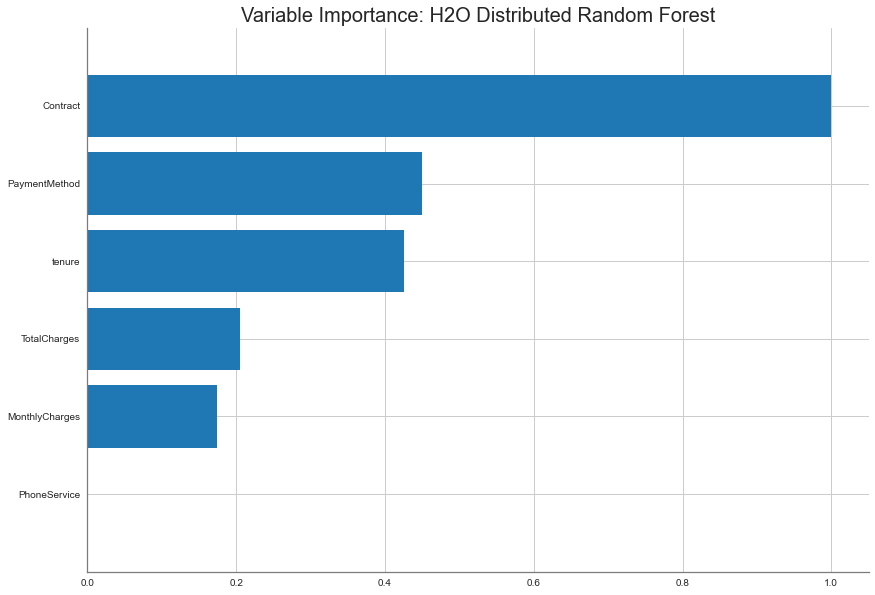

<Figure size 576x396 with 0 Axes>

In [167]:
drf.varimp_plot(7)

# Summary

## PyCaret
This week involved using automation to choose a machine learning model. Please see the following results
1. I used Pycaret to find an Ml Alogrithm that performed based on the Churn dataset.
2. I decided to select Logistic Regression because it had the highest Accuracy and Auc.
3. In addition, the Logistic Regression Model also had the second highest recall value.
4. Once the Logistic Model was selected, I saved the model to my working directory.
5. In VS code, I made script that took in new churn data and returned the probility of a customer churning.
6. I also used H20 to see how an Random forest model would compare to the pycaret model
7. The Random Forest model had slighlty less accuracy than the logistic regression model
